# <span style="color:darkblue; font-size:1.5em;">🌟 Movie Recommendation System and Analysis 🌟</span>


---

<span style="color:brown; font-size:1.25em;">✨ Important libraries ✨</span>

---


In [116]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
movies = pd.read_csv('dataset.csv')

In [118]:
movies.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [119]:
movies.shape

(10000, 9)

---

<span style="color:purple; font-size:1.25em;">✨ Handling missing values ✨</span>

---


In [120]:
movies.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [121]:
movies = movies.dropna()

In [122]:
movies.shape

(9985, 9)

In [123]:
movies.dtypes


id                     int64
title                 object
genre                 object
original_language     object
overview              object
popularity           float64
release_date          object
vote_average         float64
vote_count             int64
dtype: object

In [124]:
movies['release_date'] = pd.to_datetime(movies['release_date'])


---

<span style="color:purple; font-size:1.25em;">✨ Combinig genre and overview for NLP recommendations ✨</span>

---


In [125]:
movies['tags'] = movies['genre'] + movies['overview']

In [126]:
movies.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,tags
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,"Drama,CrimeFramed in the 1940s for the double ..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,"Comedy,Drama,RomanceRaj is a rich, carefree, h..."
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,"Drama,CrimeSpanning the years 1945 to 1955, a ..."
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,"Drama,History,WarThe true story of how busines..."
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,"Drama,CrimeIn the continuing saga of the Corle..."


#### <span style="color:teal; font-size:1.5em;">📊 Visualizations</span>


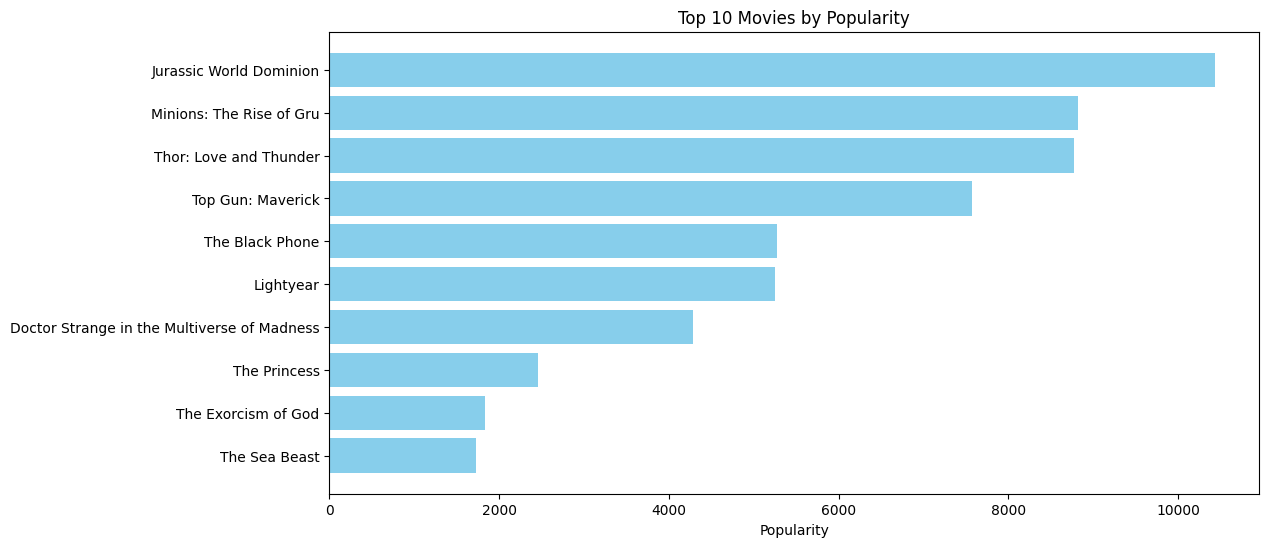

In [127]:
top_10_movies = movies.sort_values(by='popularity', ascending=False).head(10)


plt.figure(figsize=(12, 6))
plt.barh(top_10_movies['title'], top_10_movies['popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.title('Top 10 Movies by Popularity')
plt.gca().invert_yaxis()
plt.show()


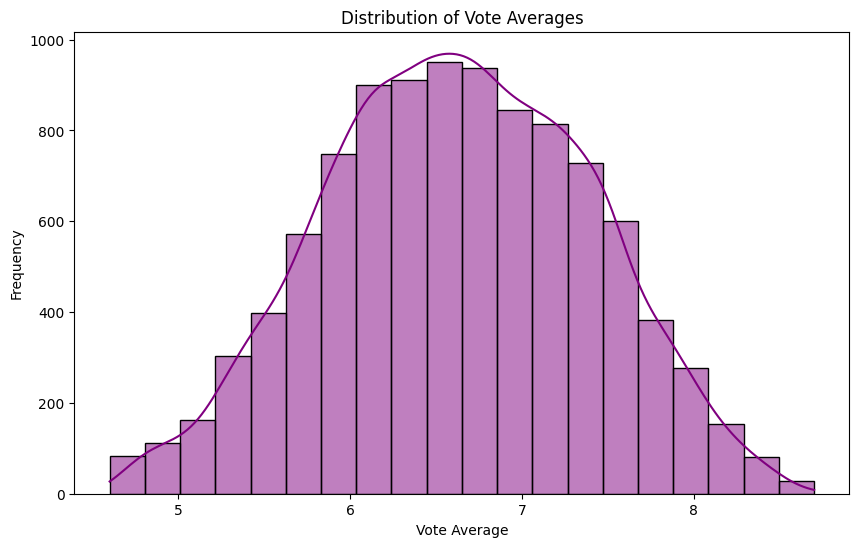

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], kde=True, bins=20, color='purple')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()


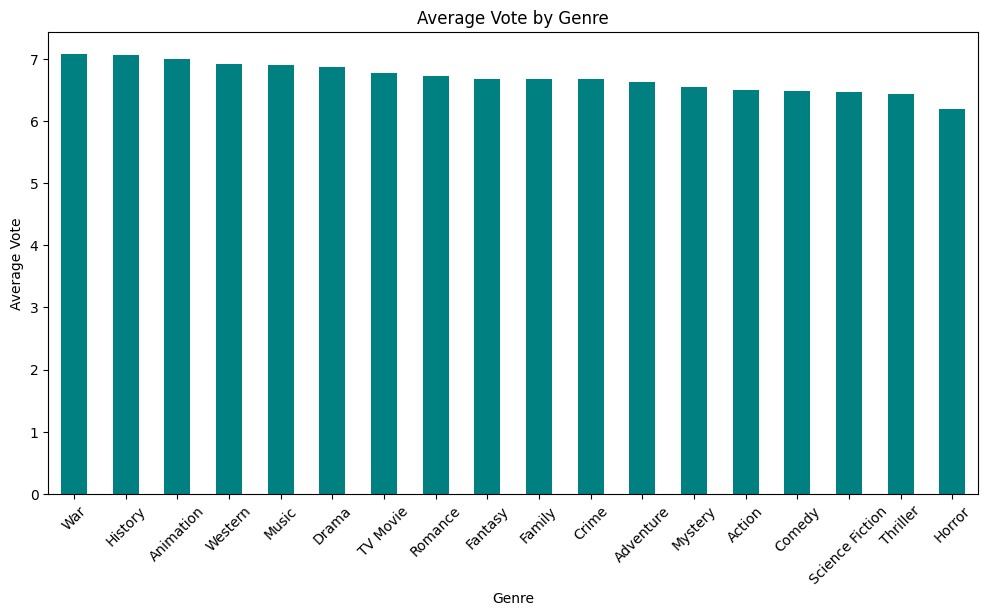

In [129]:

movies['genre_list'] = movies['genre'].str.split(',')

exploded_genres = movies.explode('genre_list')

genre_avg_rating = exploded_genres.groupby('genre_list')['vote_average'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
genre_avg_rating.plot(kind='bar', color='teal')
plt.title('Average Vote by Genre')
plt.ylabel('Average Vote')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


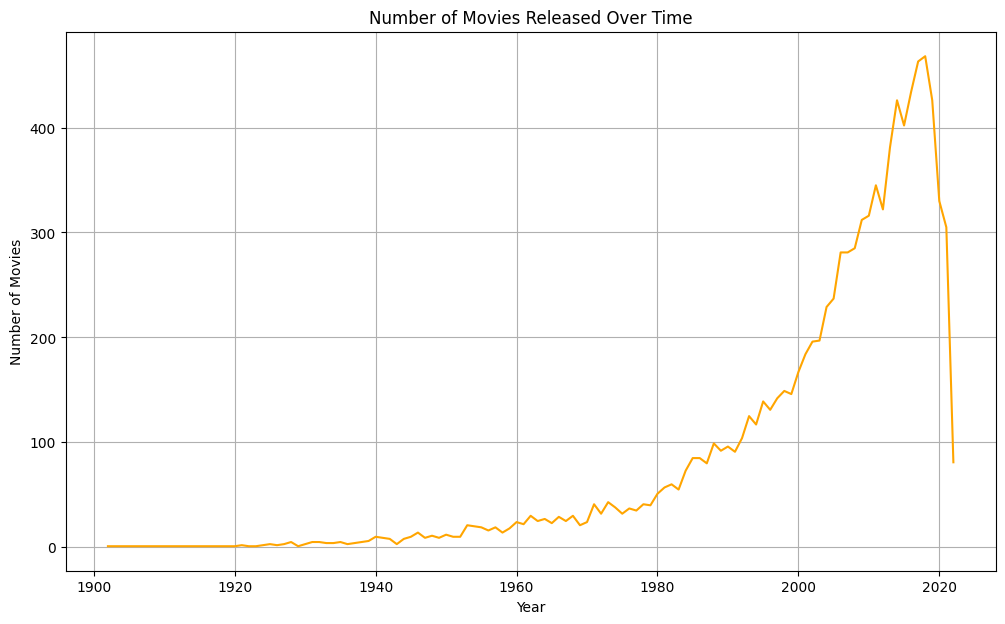

In [130]:

# Group by year and count movies
movies_per_year = movies.groupby(movies['release_date'].dt.year).size()

# Plot
plt.figure(figsize=(12, 7))
movies_per_year.plot(kind='line', color='orange')
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid()
plt.show()


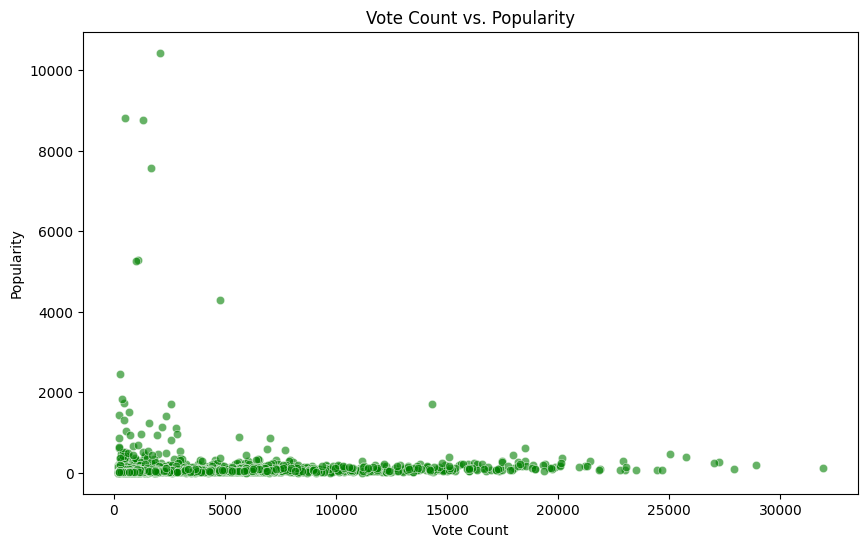

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_count', y='popularity', data=movies, alpha=0.6, color='green')
plt.title('Vote Count vs. Popularity')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.show()


---

<span style="color:purple; font-size:1.25em;">✨ awesome way to show geres ✨ </span>
<span style="color:green; font-size:1.25em;">note that (The larger the word, the more frequently it appears.)</span>

---


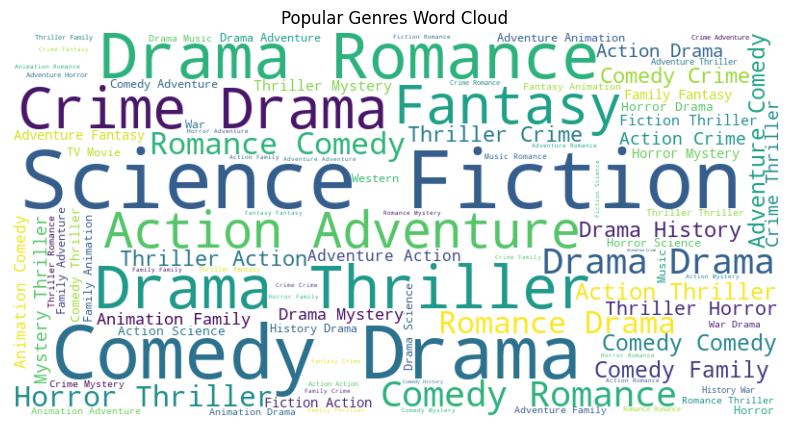

In [132]:
from wordcloud import WordCloud

all_genres = ','.join(movies['genre'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Genres Word Cloud')
plt.show()


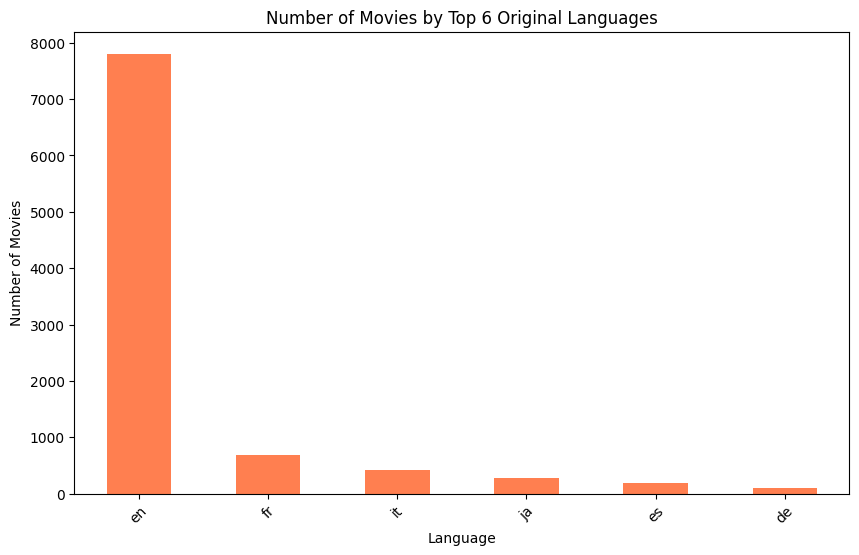

In [133]:
language_counts = movies['original_language'].value_counts().head(6) 

plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='coral')
plt.title('Number of Movies by Top 6 Original Languages')
plt.ylabel('Number of Movies')
plt.xlabel('Language')
plt.xticks(rotation=45)
plt.show()



<span style="color:green; font-size:1.25em;">only important featurse for our recommendations system </span>


In [134]:
new_def = movies[['id','title','tags']]

In [135]:
new_def.head()

,id,title,tags
0,278,The Shawshank Redemption,"Drama,CrimeFramed in the 1940s for the double ..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,RomanceRaj is a rich, carefree, h..."
2,238,The Godfather,"Drama,CrimeSpanning the years 1945 to 1955, a ..."
3,424,Schindler's List,"Drama,History,WarThe true story of how busines..."
4,240,The Godfather: Part II,"Drama,CrimeIn the continuing saga of the Corle..."


---

<span style="color:purple; font-size:1.25em;">Using CountVectorizer for counting each movie macth wich features (word)</span>

---


In [136]:
from sklearn.feature_extraction.text import CountVectorizer

In [137]:
counter_vector = CountVectorizer(max_features=1000 , stop_words='english')

In [138]:
counter_vector

CountVectorizer(max_features=1000, stop_words='english')

In [139]:
vector = counter_vector.fit_transform(new_def['tags'].values.astype('U')).toarray()

In [140]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

---

<span style="color:purple; font-size:1.25em;">Using cosine_similarity for each movie and all its similar movies according to each word</span>

---


In [141]:
from sklearn.metrics.pairwise import cosine_similarity

In [142]:
similarity = cosine_similarity(vector)

In [143]:
similarity

array([[1.        , 0.11009638, 0.09534626, ..., 0.1254363 , 0.11396058,
        0.05025189],
       [0.11009638, 1.        , 0.17320508, ..., 0.        , 0.        ,
        0.        ],
       [0.09534626, 0.17320508, 1.        , ..., 0.0438529 , 0.05976143,
        0.        ],
       ...,
       [0.1254363 , 0.        , 0.0438529 , ..., 1.        , 0.05241424,
        0.04622502],
       [0.11396058, 0.        , 0.05976143, ..., 0.05241424, 1.        ,
        0.06299408],
       [0.05025189, 0.        , 0.        , ..., 0.04622502, 0.06299408,
        1.        ]])



<span style="color:purple; font-size:1.25em;">note that all the diagonal values are 1 , because it refers to each movie similar 100% with it self</span>




#### <span style="color:teal; font-size:1.5em;">🤖 Recommendation</span>


In [144]:
def recommend(movies):
    index = new_def[new_def['title'] == movies].index[0]
    distance = sorted(list(enumerate(sim[index])),reverse = True, key=lambda vec:vec[1])
    for i in distance[0:5]:
        print(new_def.iloc[i[0]].title)
    

In [150]:
x = input("Enter the movie the have been watched ")

Enter the movie the have been watched  The Godfather


In [151]:
recommend(x)

The Godfather
Little White Lies 2
The Godfather: Part II
Felon
See No Evil 2


# **Recommendation System summary**  
_A system designed to suggest items based on user preferences and behavior._

---

## ✨ **Project Overview**  
The **Recommendation System** was built to provide personalized suggestions by analyzing users' past behaviors and interactions. Using collaborative filtering techniques, the system predicts what users will likely enjoy next.

---

## 🎯 **Outcome**  
The system is able to deliver personalized recommendations, increasing user engagement and satisfaction.

---

## 🚀 **Challenges**  
- Addressed issues with **data sparsity** and **scalability** in recommendation models.

---

## 📌 **Conclusion**  
This project demonstrates the ability of recommendation systems to personalize user experiences, providing value to both users and businesses.

---
